<font size="6"><b>Nettoyage et prétraitement des données - Partie 2</b></font>

# Libs

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

# Chargement des données

In [74]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data/dataFlight_version_1.csv", index_col=0)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,2009-05-28,AirTran Airways Corporation,671,General Mitchell International Airport,"Milwaukee, WI",WI,Wisconsin,Orlando International Airport,"Orlando, FL",FL,Florida,33,1204,1202.0,-2.0,0.0,1541,1541.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0
2013,2,6,29,6,2013-06-29,Envoy Air - MQ,3297,Grand Junction Regional Airport,"Grand Junction, CO",CO,Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",TX,Texas,74,1630,1644.0,14.0,14.0,1945,1942.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0
2010,3,8,31,2,2010-08-31,Delta Airlines,1806,Los Angeles International Airport,"Los Angeles, CA",CA,California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",MI,Michigan,43,1305,1305.0,0.0,0.0,2035,2015.0,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0
2006,1,1,15,7,2006-01-15,US Airways Inc.,465,Newark Liberty International Airport,"Newark, NJ",NJ,New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",NC,North Carolina,36,1820,1911.0,51.0,51.0,2026,2058.0,32.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,Jan,1
2006,3,8,7,1,2006-08-07,Continental Air Lines Inc.,1431,Boston Logan International Airport,"Boston, MA",MA,Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",OH,Ohio,44,1755,1751.0,-4.0,0.0,2000,2002.0,2.0,2.0,0.0,0.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,Aug,1


<b>GLOSSAIRE DES JOURS DE SEMAINE</b> 

* 0 = lundi
* 1 = mardi
* 2 = mercredi
* 3 = jeudi
* 4 = vendredi
* 5 = samedi
* 6 = dimanche

# Prétraitement

Même si un grand nombre de prétraitements et de nettoyages ont été effectués, celui-ci ne visera qu'à obtenir un cadre de données final pour la modélisation, qui ne contiendra que les 20 premières villes. La raison de procéder ainsi est que la caractéristique DEST est une colonne catégorielle de 396 valeurs. L'encodage à chaud sera donc effectué pour ces 20 destinations au lieu des 358 destinations totales.

In [75]:
df.Dest.nunique()

396

La première étape consiste à éliminer les colonnes que je n'utiliserai pas :

J'ai fait des recherches sur les 15 vraies raisons pour lesquelles les vols sont retardés, et j'ai été surpris de constater que beaucoup de celles que j'ai dans mon cadre de données ne le sont pas. Par conséquent, avant d'abandonner certaines de mes fonctionnalités, prenez une minute pour parcourir cette liste afin de mieux comprendre pourquoi j'ai abandonné certaines d'entre elles :

1. Contrôle du trafic aérien
2. Mauvais temps
3. Impacts d'oiseaux
4. Effet d'entraînement
5. Grèves
6. Liaison entre les passagers
7. Correspondance des bagages
8. Le fret
9. Attente de l'équipage
10. Exigences en matière de repos de l'équipage
11. Restauration
12. Habilitation de sécurité
13. Préparation des avions
14. Problèmes mécaniques
15. Restrictions de poids


* FLIGHT_DATE : il s'agit d'une catégorie dont je n'ai pas besoin car j'ai déjà le JOUR et le MOIS.
* TAXI_OUT, WHEELS_OFF, WHEELS_ON, et TAXI_ON
* DayofMonth : Pendant l'EDA, j'ai vu que cela n'avait pas beaucoup d'impact. Peut-être que le jour de la semaine et l'heure ont un impact, mais je ne suis pas entré dans les détails par manque de temps.

In [76]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted', 'Flights',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [77]:
df = df.reset_index() # convertir l'index "Year" en colonne

In [78]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted', 'Flights',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [79]:
df['Unique_Flight_ID'] = df['Flight_Number_Reporting_Airline'].astype(str) + '_' + df['Reporting_Airline'] + '_' + df['FlightDate'].astype(str)

In [80]:
df = df.drop(columns=['FlightDate', 'Flight_Number_Reporting_Airline', 'OriginState', 'DestState', 'DestWac', 'CRSDepTime',
       'DepTime', 'CRSArrTime', 'ArrTime',])

In [81]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
0,2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,-2.0,0.0,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
1,2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,14.0,14.0,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2,2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0,0.0,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
3,2006,1,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,51.0,51.0,32.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,Jan,1,465_US Airways Inc._2006-01-15
4,2006,3,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,"Boston, MA",Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",Ohio,-4.0,0.0,2.0,2.0,0.0,0.0,1.0,563.0,3,0.0,0.0,0.0,0.0,0.0,Aug,1,1431_Continental Air Lines Inc._2006-08-07


In [82]:
df.shape

(1164841, 29)

Enregistrement en tant que fichier .csv

In [83]:
import os

# Spécifier le chemin d'enregistrement
folder_path = "/content/drive/MyDrive/Data/"
file_name = "dataFlight_version_2.csv"
file_path = os.path.join(folder_path, file_name)

df.to_csv(file_path, index=False)

In [84]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
Reporting_Airline        0
Origin                   0
OriginCityName           0
OriginStateName          0
Dest                     0
DestCityName             0
DestStateName            0
DepDelay             20337
DepDelayMinutes          0
ArrDelay             23399
ArrDelayMinutes          0
Cancelled                0
Diverted                 0
Flights                  0
Distance                 0
DistanceGroup            0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
MONTH_AB                 0
FLIGHT_STATUS            0
Unique_Flight_ID         0
dtype: int64

In [85]:
data = df[ (df['Cancelled'] == 1)]


In [86]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
14,2017,3,7,26,3,Southwest Airlines,Sacramento International Airport,"Sacramento, CA",California,Los Angeles International Airport,"Los Angeles, CA",California,NaN,0.0,NaN,0.0,1.0,0.0,1.0,373.0,2,0.0,0.0,0.0,0.0,0.0,Jul,0,995_Southwest Airlines_2017-07-26
92,2007,1,2,24,6,American Airlines,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,Norfolk International Airport,"Norfolk, VA",Virginia,NaN,0.0,NaN,0.0,1.0,0.0,1.0,1213.0,5,0.0,0.0,0.0,0.0,0.0,Feb,0,804_American Airlines_2007-02-24
120,2004,3,7,16,5,Envoy Air - MQ,Chicago O'Hare International Airport,"Chicago, IL",Illinois,Syracuse Hancock International Airport,"Syracuse, NY",New York,NaN,0.0,NaN,0.0,1.0,0.0,1.0,607.0,3,0.0,0.0,0.0,0.0,0.0,Jul,0,4291_Envoy Air - MQ_2004-07-16
318,2012,1,1,3,2,Southwest Airlines,San Diego International Airport,"San Diego, CA",California,Sacramento International Airport,"Sacramento, CA",California,NaN,0.0,NaN,0.0,1.0,0.0,1.0,480.0,2,0.0,0.0,0.0,0.0,0.0,Jan,0,1228_Southwest Airlines_2012-01-03
388,2007,1,2,24,6,Endeavor Air - 9E,St. Louis Lambert International Airport,"St. Louis, MO",Missouri,Minneapolis-St. Paul International Airport,"Minneapolis, MN",Minnesota,NaN,0.0,NaN,0.0,1.0,0.0,1.0,449.0,2,0.0,0.0,0.0,0.0,0.0,Feb,0,4703_Endeavor Air - 9E_2007-02-24


In [54]:
print(df.columns)

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'DepDelay', 'DepDelayMinutes',
       'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted', 'Flights',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS',
       'Unique_Flight_ID'],
      dtype='object')


# Analyse de la corrélation

Examiner la corrélation.

In [55]:
df.corr()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FLIGHT_STATUS
Year,1.000000,-0.030847,-0.030105,-0.002074,-0.000950,0.015716,0.026399,-0.024280,0.007337,NaN,NaN,NaN,0.068025,0.068508,0.017431,0.000105,-0.009845,-0.003780,0.023121,-0.066834
Quarter,-0.030847,1.000000,0.971070,0.009952,0.000741,-0.005093,-0.005659,-0.004834,-0.006890,NaN,NaN,NaN,0.002012,0.002233,-0.000336,-0.004484,0.000378,0.001584,-0.001045,-0.005857
Month,-0.030105,0.971070,1.000000,0.008550,0.001097,-0.003256,-0.003941,-0.003110,-0.005216,NaN,NaN,NaN,0.002399,0.002640,0.000555,-0.004529,0.000973,0.001784,0.000553,-0.003674
DayofMonth,-0.002074,0.009952,0.008550,1.000000,0.001664,0.006372,0.005952,0.005558,0.005137,NaN,NaN,NaN,0.001778,0.001532,0.002775,0.000393,0.000389,0.000354,0.006634,0.005880
DayOfWeek,-0.000950,0.000741,0.001097,0.001664,1.000000,0.000440,-0.000091,-0.006310,-0.003612,NaN,NaN,NaN,0.016167,0.016229,0.003274,-0.000460,-0.010334,0.001881,-0.002804,-0.004800
DepDelay,0.015716,-0.005093,-0.003256,0.006372,0.000440,1.000000,0.995785,0.937815,0.953994,NaN,NaN,NaN,0.013549,0.013501,0.636578,0.275455,0.324474,0.027631,0.635388,0.406749
DepDelayMinutes,0.026399,-0.005659,-0.003941,0.005952,-0.000091,0.995785,1.000000,0.934756,0.958805,NaN,NaN,NaN,0.009137,0.009058,0.643766,0.278948,0.322964,0.027122,0.638173,0.381243
ArrDelay,-0.024280,-0.004834,-0.003110,0.005558,-0.006310,0.937815,0.934756,1.000000,0.978289,NaN,NaN,NaN,-0.018695,-0.018878,0.600128,0.275053,0.457756,0.027692,0.602320,0.539476
ArrDelayMinutes,0.007337,-0.006890,-0.005216,0.005137,-0.003612,0.953994,0.958805,0.978289,1.000000,NaN,NaN,NaN,0.005931,0.005670,0.625290,0.288344,0.460620,0.026820,0.616656,0.434308
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Identifier les paires de variables qui sont fortement corrélées, ce qui peut être utile pour la sélection des variables à inclure dans une analyse de régression ou pour identifier des problèmes de colinéarité qui peuvent affecter les résultats de l'analyse.

In [56]:
abs(df.corr())>.75

,Year,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FLIGHT_STATUS
Year,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Quarter,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Month,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DayofMonth,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DayOfWeek,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
DepDelay,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
DepDelayMinutes,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
ArrDelay,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
ArrDelayMinutes,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False
Cancelled,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


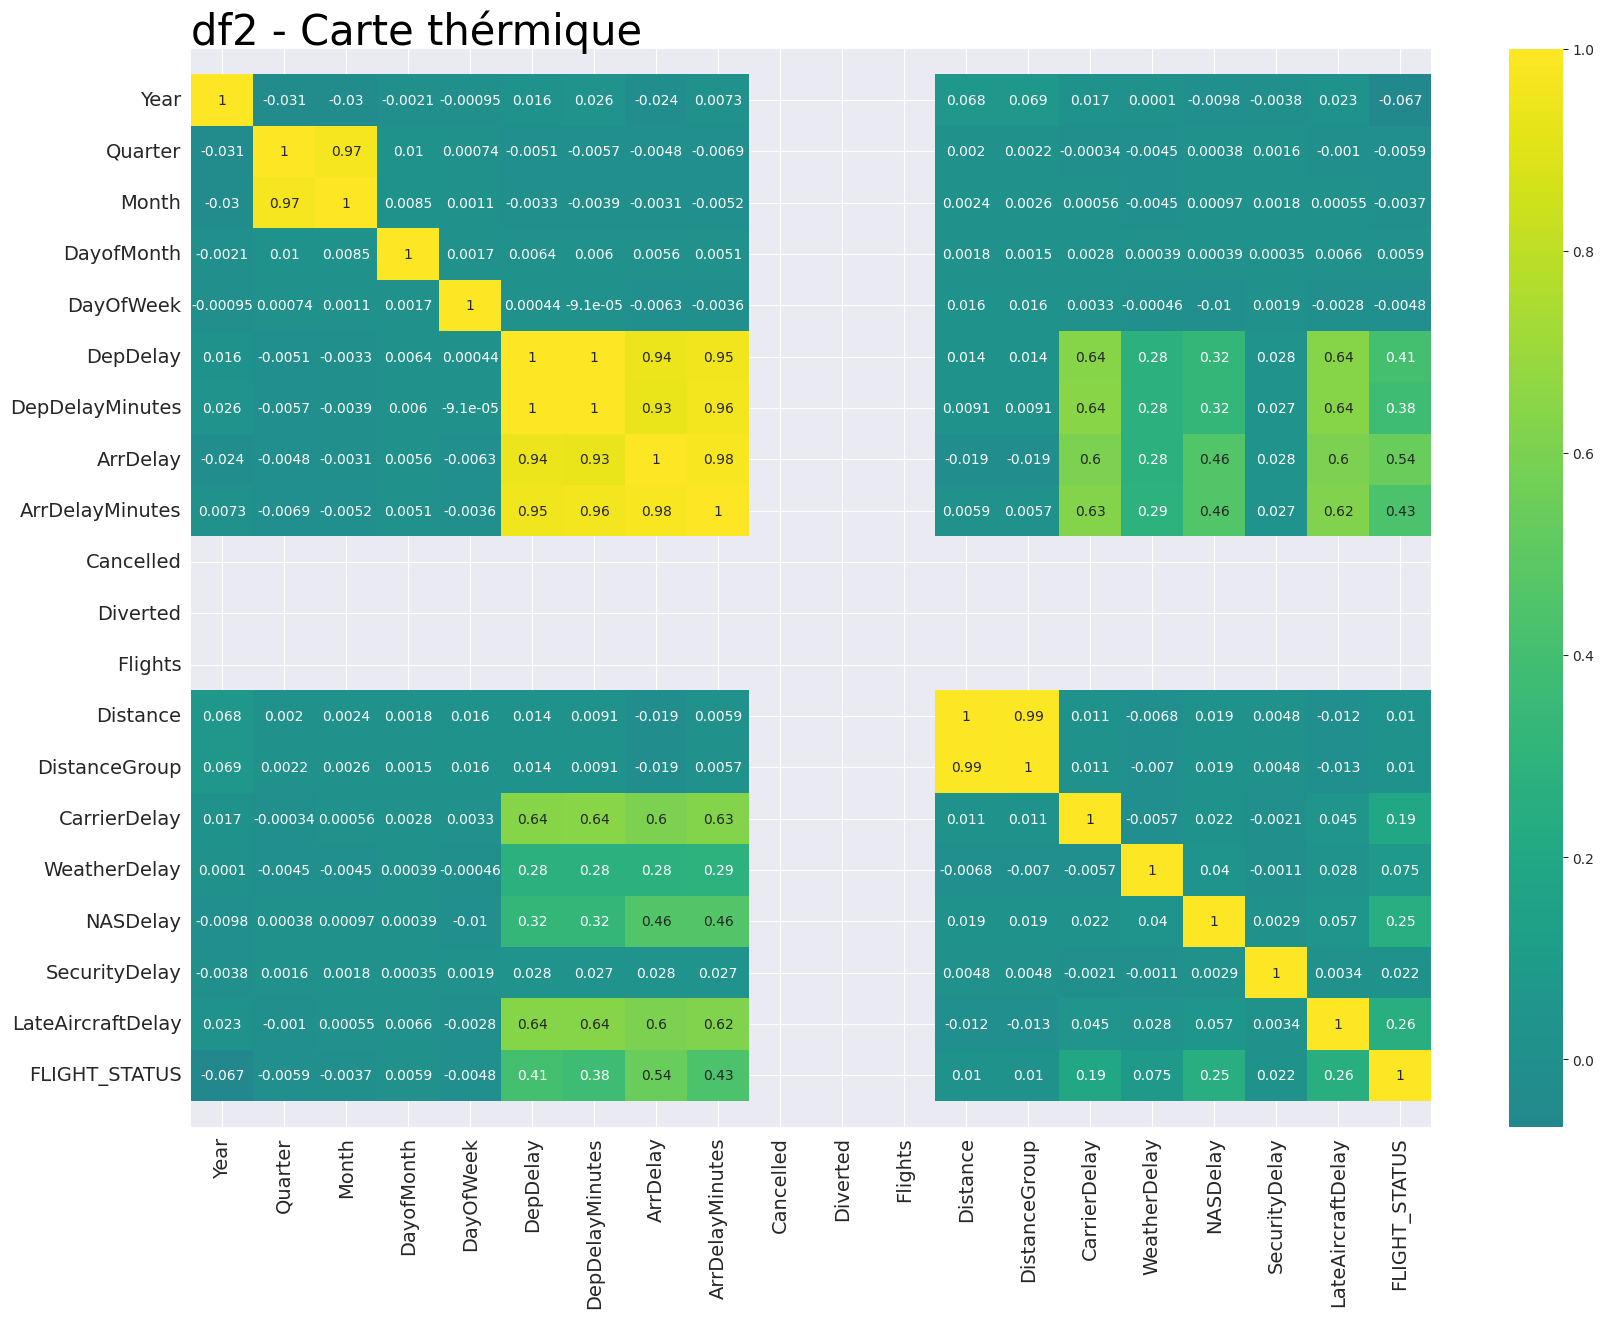

In [57]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Carte thérmique", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

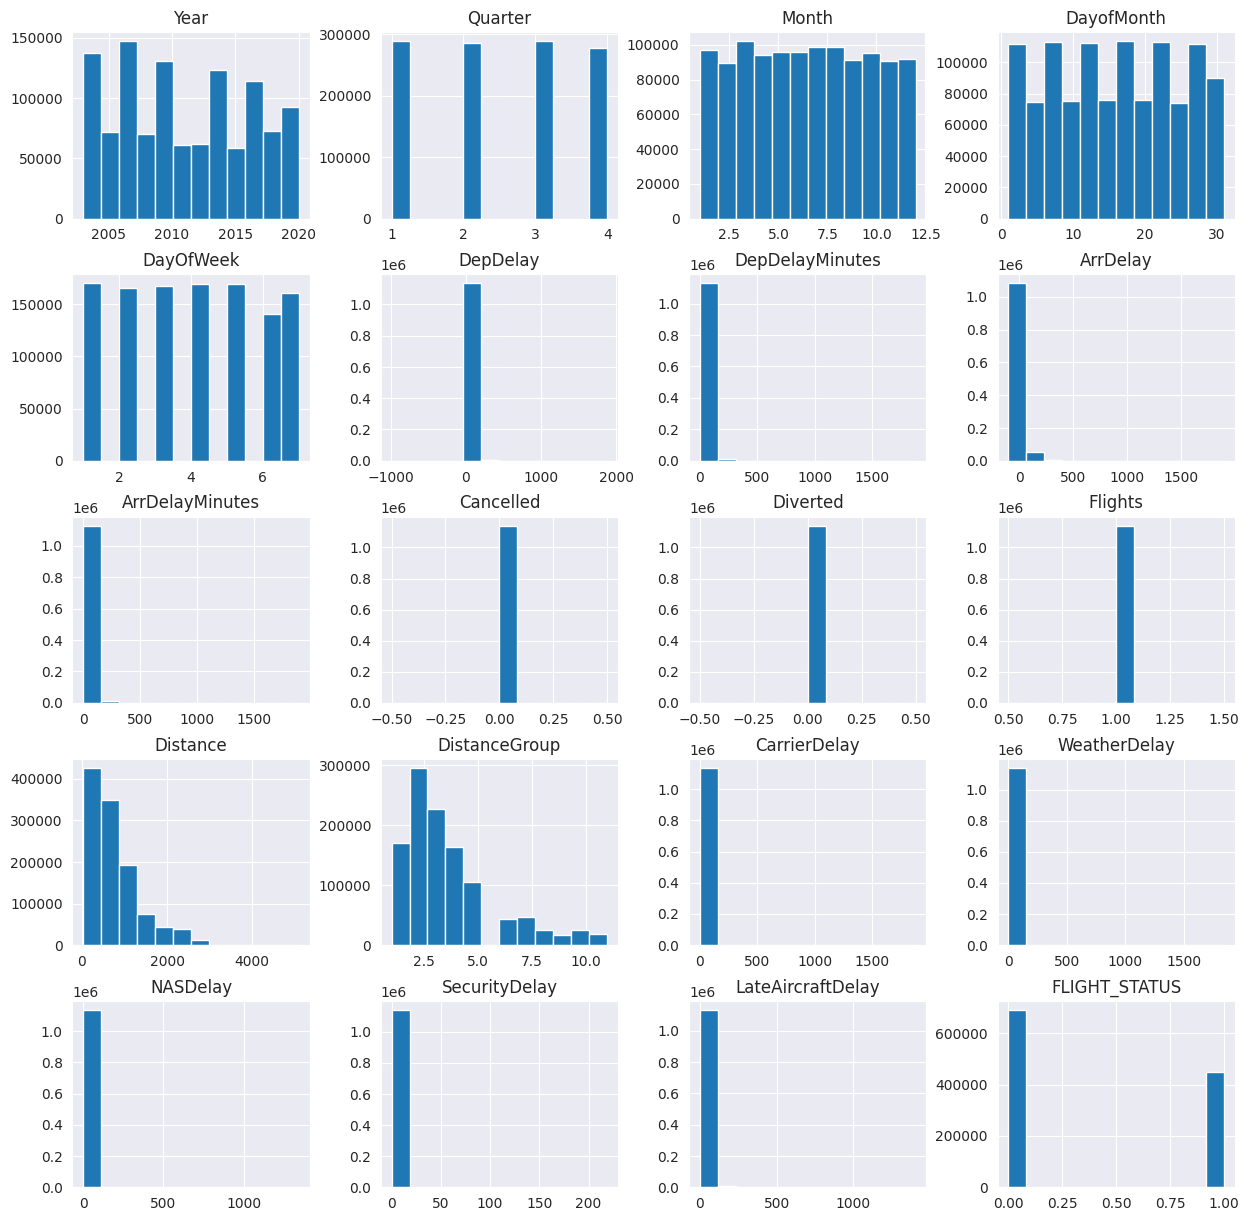

In [58]:
df.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [59]:
df_jan = df[(df['Month'] == 1)]
df_jan.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
3,2006,1,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,51.0,51.0,32.0,32.0,0.0,0.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,Jan,1,465_US Airways Inc._2006-01-15
13,2006,1,1,28,6,United Airlines - UA,Los Angeles International Airport,"Los Angeles, CA",California,Washington Dulles International Airport,"Washington, DC",Virginia,-3.0,0.0,-14.0,0.0,0.0,0.0,1.0,2288.0,10,0.0,0.0,0.0,0.0,0.0,Jan,0,210_United Airlines - UA_2006-01-28
37,2008,1,1,25,5,United Airlines - UA,San Francisco International Airport,"San Francisco, CA",California,Los Angeles International Airport,"Los Angeles, CA",California,215.0,215.0,221.0,221.0,0.0,0.0,1.0,337.0,2,36.0,0.0,6.0,0.0,179.0,Jan,1,1163_United Airlines - UA_2008-01-25
45,2005,1,1,18,2,Northwest Airlines,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,Southwest Florida International Airport,"Fort Myers, FL",Florida,39.0,39.0,26.0,26.0,0.0,0.0,1.0,1085.0,5,26.0,0.0,0.0,0.0,0.0,Jan,1,1108_Northwest Airlines_2005-01-18
47,2004,1,1,12,1,Delta Airlines,Tampa International Airport,"Tampa, FL",Florida,Cincinnati/Northern Kentucky International Air...,"Cincinnati, OH",Kentucky,-4.0,0.0,-9.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jan,0,550_Delta Airlines_2004-01-12


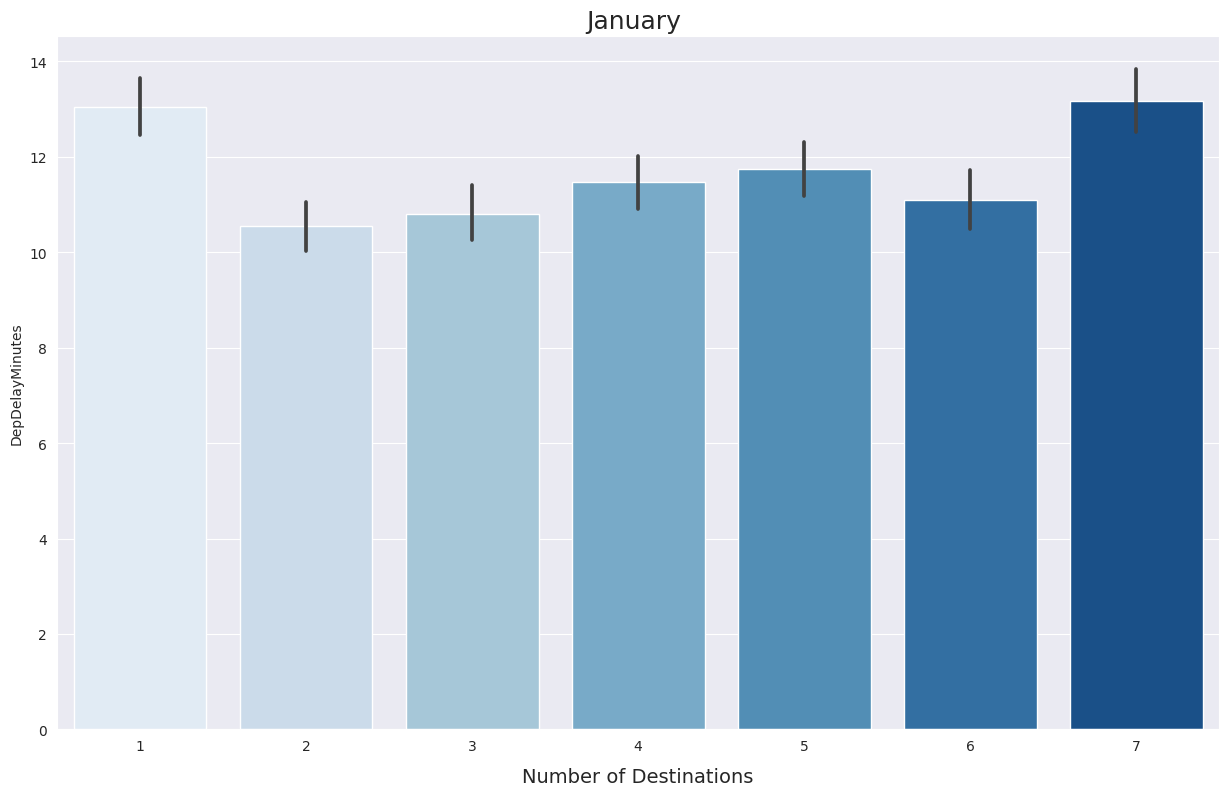

In [60]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DayOfWeek", y="DepDelayMinutes", data=df_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()